In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy                  # http://scipy.org/
from scipy.fftpack import fft, fftfreq
from time import time



%matplotlib inline

params = {'legend.fontsize': 24,
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)


In [4]:
def BJT(vi,vt,i):
    return i*(np.exp(vi/vt)-1)

def MOSFET(vi,vt,i):
    return i*(vi-vt)**2



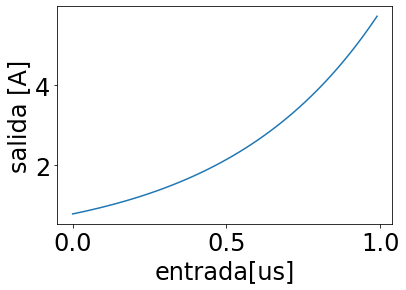

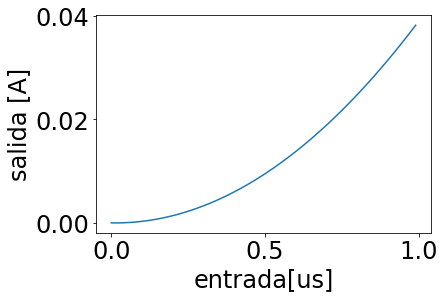

In [45]:
vi  = np.arange(0, 1, 0.01)
vt  = 25e-3
Iss = 1e-14
VBE = 0.8
FBJ  = 0.05
plt.plot(vi, BJT(vi*FBJ+VBE,vt,Iss))
plt.ylabel('salida [A]')
plt.xlabel('entrada[us]')
plt.show()


vth = 4
Idss= 10e-3
VGS = 0
FMF = 2
plt.plot(vi, MOSFET(vi*FMF+VGS,vt,Idss))
plt.ylabel('salida [A]')
plt.xlabel('entrada[us]')
plt.show()

In [35]:
# Ejemplo AM en el tiempo
# modulante
f1   = 1 #Hz
A1   = 1   
# carrier
f2   = 3
A2   = 1

K    = 8
a    = 2
b    = 0.2
c    = 0.02

# defino el sampleo
Fs = 10*(f1+f2) #Sps 
dt = 1/Fs
# tiempo maximo del analisis 
T = 4/f1 
# vector de tiempo 
time  = np.arange(0, T, dt)


# señal
S1   = (np.cos(2*np.pi*f1*time) )
S2   = (np.cos(2*np.pi*f2*time) )
  
vi   = (S1 + S2)/2 
           
voBJT   = BJT(vi*FBJ+VBE,vt,Iss)
           
voMF    = MOSFET(vi*FMF+VGS,vt,Idss)


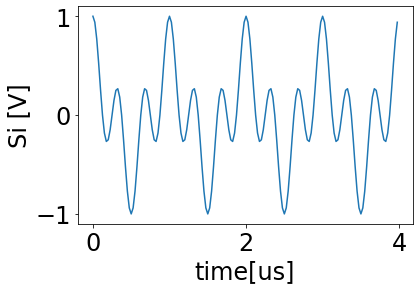

In [36]:
plt.plot(time, vi)
plt.ylabel('Si [V]')
plt.xlabel('time[us]')
plt.show()

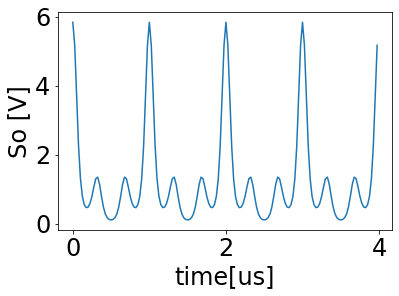

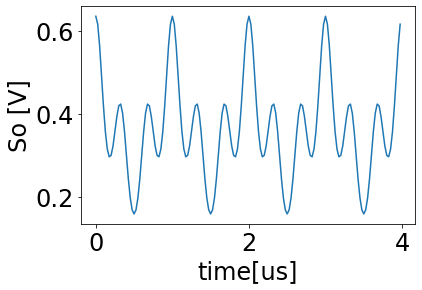

In [37]:
plt.plot(time, voBJT)
plt.ylabel('So [V]')
plt.xlabel('time[us]')
plt.show()

plt.plot(time, voMF)
plt.ylabel('So [V]')
plt.xlabel('time[us]')
plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


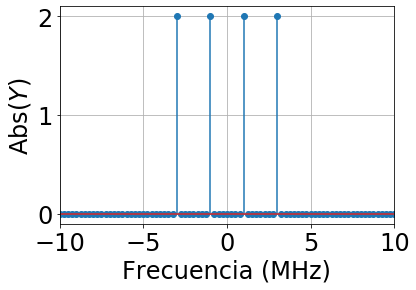

In [38]:
# FFT

Fam = fft(Si) / len(Si)  # Normalizada
frq = fftfreq(len(Si), dt)  # Recuperamos las frecuencias
plt.stem(frq, np.abs(Fam) )  

plt.xlim(-10, 10)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


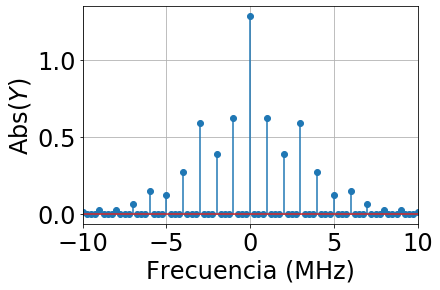

In [41]:

Fam = fft(voBJT) / len(voBJT)  # Normalizada

frq = fftfreq(len(voBJT), dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fam) )  

plt.xlim(-10, 10)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


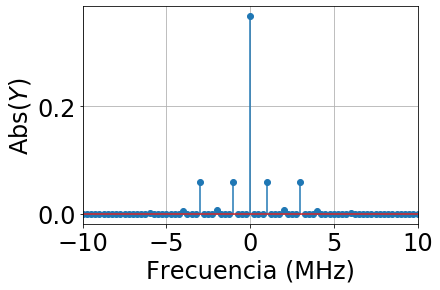

In [42]:
Fam = fft(voMF) / len(voMF)  # Normalizada

frq = fftfreq(len(voBJT), dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fam) )  

plt.xlim(-10, 10)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()